In [10]:
# Title: Drug Overdose Death Rates Analysis

    # Author: Caroline Gore
    # Date: December 6, 2024
    # Description: This script performs an analysis of drug overdose death rates across U.S. states from 2015 to 2023.

# Deliverables:
    # Visualizations saved in the Visuals directory.
    # Analysis aims to identify patterns in overdose deaths and regional variations.


In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen
import plotly.express as px
import json
import warnings
import numpy as np
import plotly.io as pio

In [12]:
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the data
df = pd.read_csv('UNC/CHIP490/Milestone02/VSRR_Provisional_Drug_Overdose_Death_Counts.csv', low_memory=False)

# Clean the data by selecting relevant columns and making a copy
df_filtered = df[['State', 'Year', 'Data Value']].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert 'Data Value' to numeric, and filter out rows with missing values
df_filtered['Data Value'] = pd.to_numeric(df_filtered['Data Value'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Data Value'])

In [13]:
# Load the geojson web file
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Ensure state data is in two-letter abbreviation format
state_mapping = {
    "Alaska": "AK", "Alabama": "AL", "Arkansas": "AR", "Arizona": "AZ", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "District of Columbia": "DC", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Iowa": "IA", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Massachusetts": "MA", "Maryland": "MD", "Maine": "ME", "Michigan": "MI", "Minnesota": "MN",
    "Missouri": "MO", "Mississippi": "MS", "Montana": "MT", "North Carolina": "NC",
    "North Dakota": "ND", "Nebraska": "NE", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "Nevada": "NV", "New York": "NY", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Virginia": "VA",
    "Vermont": "VT", "Washington": "WA", "Wisconsin": "WI", "West Virginia": "WV", "Wyoming": "WY"
}

df_filtered['State'] = df_filtered['State'].replace(state_mapping)

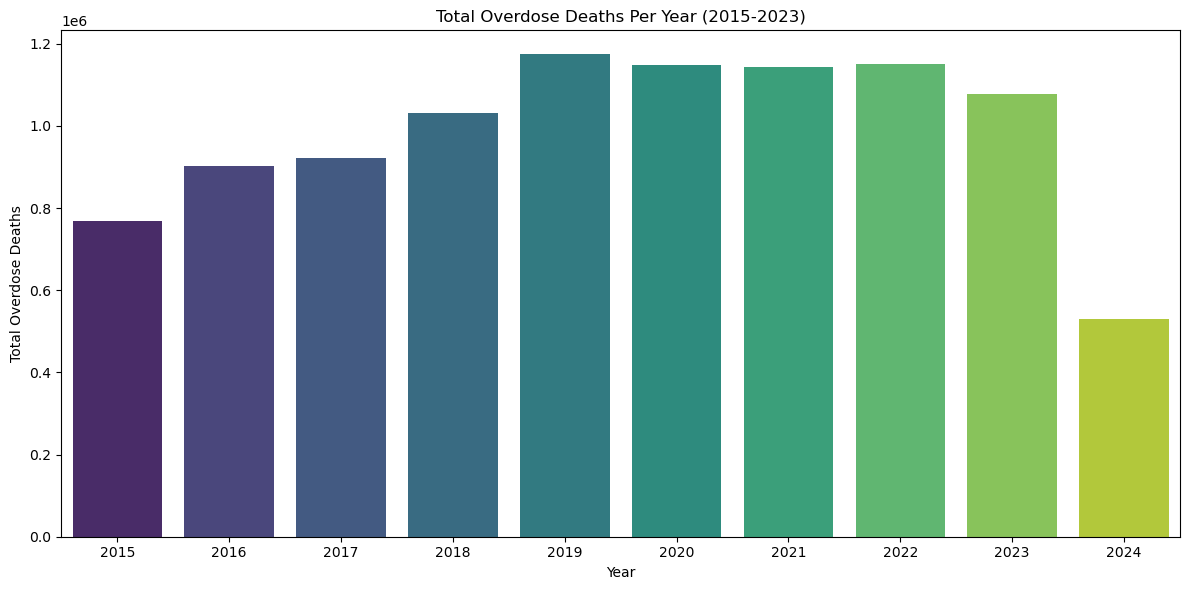

In [14]:
# Group the data by 'Year' and sum 'Data Value'
df_year = df_filtered.groupby(['Year']).agg({'Data Value': 'sum'}).reset_index()

# Plot overdose deaths per year using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Data Value', data=df_year, palette='viridis')
plt.title('Total Overdose Deaths Per Year (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.tight_layout()

# Save the barplot
plt.savefig('UNC/CHIP490/Milestone02/Visuals/total_overdose_deaths_per_year.png')

# Display the plot
plt.show()

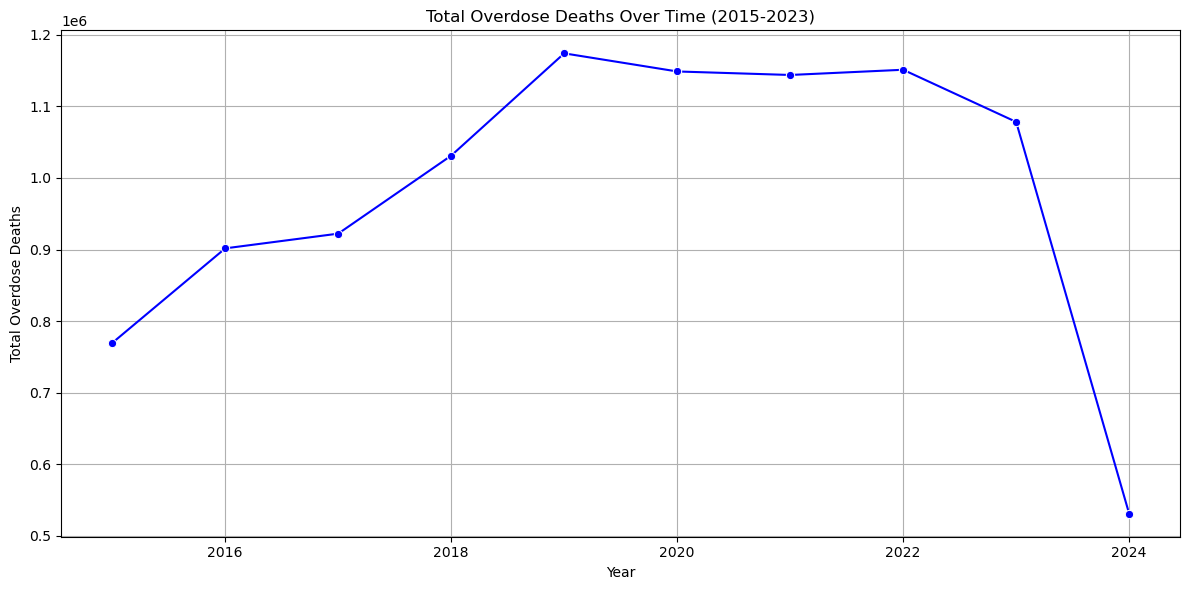

In [15]:
# Line Plot: Overdose Deaths Trend Over Time (for all states combined)
df_yearly = df_filtered.groupby('Year').agg({'Data Value': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='Year', y='Data Value', marker='o', linestyle='-', color='b')
plt.title('Total Overdose Deaths Over Time (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.grid(True)
plt.tight_layout()

# Save the line plot
plt.savefig('UNC/CHIP490/Milestone02/Visuals/total_overdose_deaths_over_time.png')

# Display the plot
plt.show()

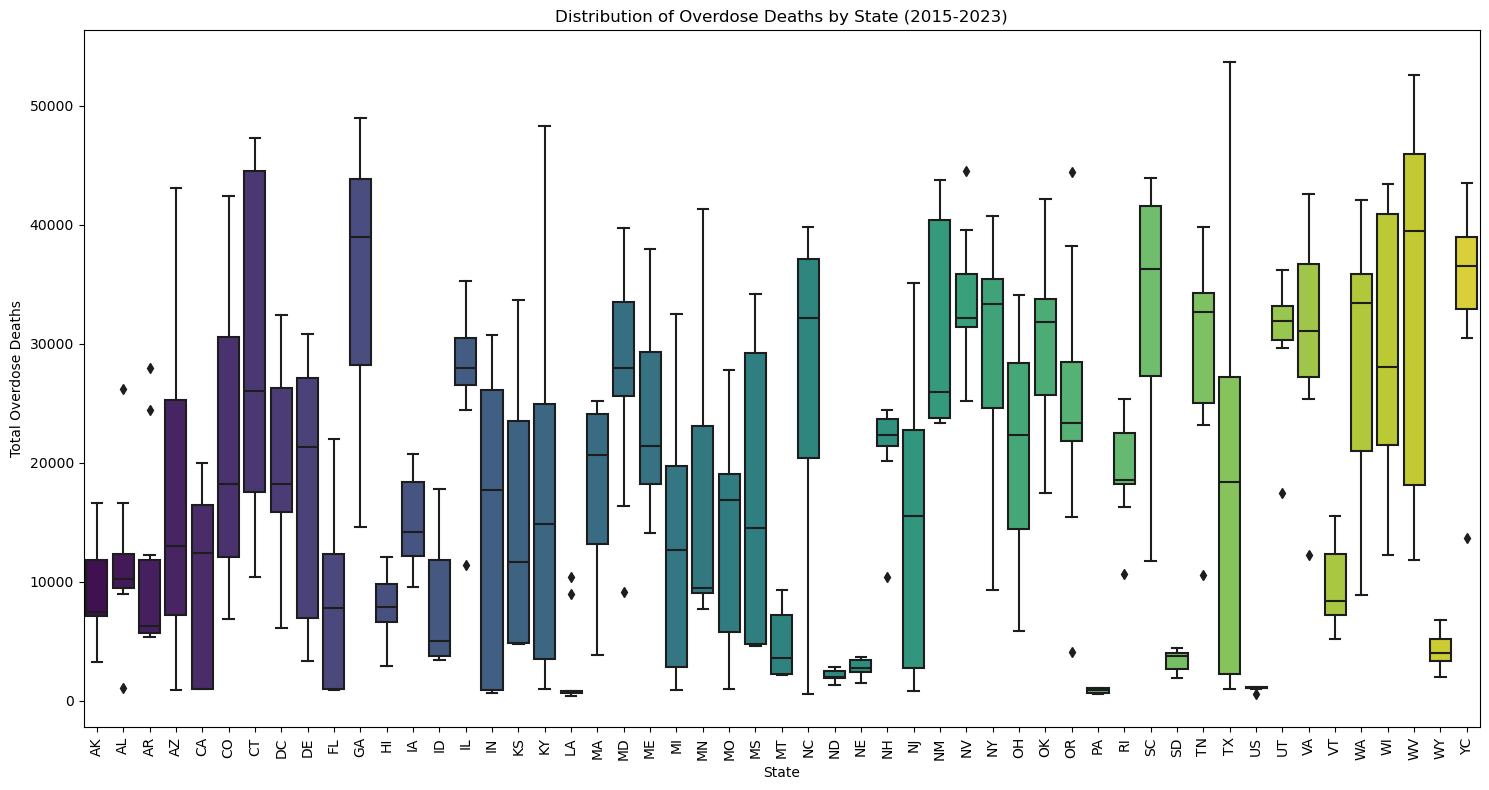

In [16]:
# Box Plot: Distribution of Overdose Deaths by State
df_statewise = df_filtered.groupby(['State', 'Year']).agg({'Data Value': 'sum'}).reset_index()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_statewise, x='State', y='Data Value', palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Overdose Deaths by State (2015-2023)')
plt.xlabel('State')
plt.ylabel('Total Overdose Deaths')
plt.tight_layout()

# Save the boxplot
plt.savefig('UNC/CHIP490/Milestone02/Visuals/distribution_of_overdose_deaths_by_state.png')

# Display the plot
plt.show()

In [17]:
# Choropleth Map: Overdose Deaths Across States
fig_choropleth = px.choropleth(
    df_statewise,
    locations="State",
    locationmode="USA-states",
    color="Data Value",
    hover_name="State",
    scope="usa",
    title="Overdose Deaths Across U.S. States (2015-2023)",
    animation_frame="Year",
    color_continuous_scale="Reds"
)

# Save the choropleth map 
fig_choropleth.write_image('UNC/CHIP490/Milestone02/Visuals/overdose_deaths_across_us_states.png')

# Display the map
fig_choropleth.show()

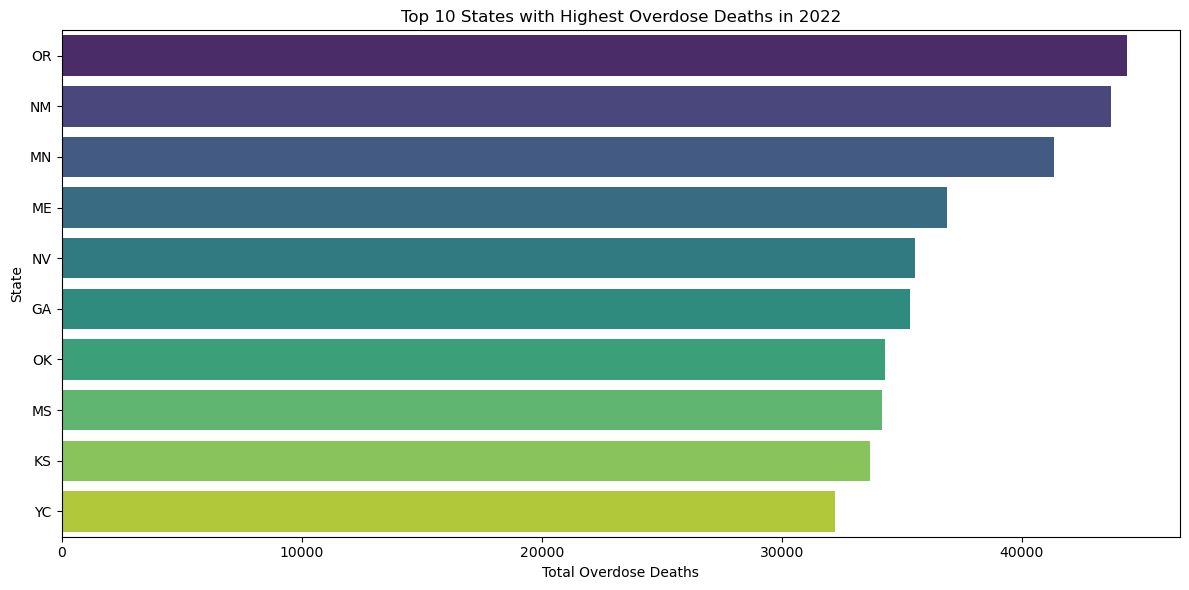

In [18]:
# Filter the data for the year 2022
df_2022 = df_filtered[df_filtered['Year'] == 2022]

# Group by 'State' and sum 'Data Value'
df_top_states_2022 = df_2022.groupby(['State']).agg({'Data Value': 'sum'}).reset_index()
df_top_states_2022 = df_top_states_2022.sort_values(by='Data Value', ascending=False).head(10)

# Plot the top 10 states with overdose deaths in 2022
plt.figure(figsize=(12, 6))
sns.barplot(x='Data Value', y='State', data=df_top_states_2022, palette='viridis')
plt.title('Top 10 States with Highest Overdose Deaths in 2022')
plt.xlabel('Total Overdose Deaths')
plt.ylabel('State')
plt.tight_layout()

# Save the barplot
plt.savefig('UNC/CHIP490/Milestone02/Visuals/top_10_states.png')

# Display the plot
plt.show()